# Learning Pandas - Part I

The goal of the following exercise is to learn the basic Pandas functionality and data vizualization techniques. We'll load data from a CSV file, clean it up, answer some exploratory questions and plot a subset of our data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, csv

## Reading Data

To begin, I downloaded a dataset from Zillow (https://www.zillow.com/research/data/) containing the average home prices in all US cities since 1996. On Zillow website it is called "ZHVI Single Homes Time Series ($) by City 1996 – 2018 (monthly)", csv file. 

In [2]:
os.chdir('C:\\Users\\Elena\\My Documents\\Python Programs\\Stats Project')    #file should be in the current working directory
hv = pd.read_csv('CityHomeValues.csv')
print ('Opening csv file...')

Opening csv file...


We now have our data. By using hv.head(), we can take a look at the first few rows. We see that the table contains average home values for each city starting 04/1996 and ending in 05/2018. Other columns that might be of interest are State and County Name. The rest of the columns can be removed.

In [3]:
hv.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
0,6181,New York,NY,New York,Queens,1,171900.0,172100.0,172400.0,172500.0,...,550700,555300,558600,561500,564700,570000,576700,583300,589400,593600
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,166400.0,165900.0,165500.0,164900.0,...,671300,677400,683200,688500,693800,700600,707800,712300,714100,714700
2,17426,Chicago,IL,Chicago,Cook,3,112000.0,113100.0,113900.0,114300.0,...,192300,193400,194900,196600,198500,200800,203100,204800,206300,207100
3,39051,Houston,TX,Houston,Harris,4,89100.0,89000.0,89000.0,89200.0,...,175700,176700,177800,178500,179200,180600,182100,183300,184500,185300
4,13271,Philadelphia,PA,Philadelphia,Philadelphia,5,46100.0,46000.0,45900.0,45800.0,...,130900,132300,133500,134600,135200,136500,138400,139900,140800,141300


Now let's size up and explore our data. 

hv.info() method will give us the DataFrame index dtype, column dtypes and their quantity, non-null values and memory usage.
At the start we have 272 columns and 12854 rows of data. Another way to see the number of rows and columns is to use hv.shape

In [4]:
hv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854 entries, 0 to 12853
Columns: 272 entries, RegionID to 2018-05
dtypes: float64(219), int64(49), object(4)
memory usage: 26.7+ MB


In [5]:
hv.shape

(12854, 272)

To only select the columns of one data type, we can use hv.select_dtypes() method

In [6]:
hv.select_dtypes(include=['object']).head(2)

,RegionName,State,Metro,CountyName
0,New York,NY,New York,Queens
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles


Alternatively, we can use hv.filter() method to select columns we are interested in.

In [7]:
hv.filter(like='Region').head(2)

,RegionID,RegionName
0,6181,New York
1,12447,Los Angeles


If we are interested in a particular series, we can pass a column name as a string to the indexing operator

In [8]:
hv['CountyName'].head(7)

0          Queens
1     Los Angeles
2            Cook
3          Harris
4    Philadelphia
5        Maricopa
6           Clark
Name: CountyName, dtype: object

Alternatively, to access a series, we can use the dot notation. Plus, it allows us to use autocomplete intelligence.
If you place cursor on the object and press Shift + Tab + Tab, a Docstring will appear.

In [9]:
hv.RegionName.head()

0        New York
1     Los Angeles
2         Chicago
3         Houston
4    Philadelphia
Name: RegionName, dtype: object

Next let's remove any columns we don't need and assign what we have left to a new dataframe hv1

In [10]:
hv1 = hv.drop(columns=['RegionID', 'Metro', 'CountyName', 'SizeRank'])
print (hv1.head(3))

    RegionName State   1996-04   1996-05   1996-06   1996-07   1996-08  \
0     New York    NY  171900.0  172100.0  172400.0  172500.0  172500.0   
1  Los Angeles    CA  166400.0  165900.0  165500.0  164900.0  164500.0   
2      Chicago    IL  112000.0  113100.0  113900.0  114300.0  114100.0   

    1996-09   1996-10   1996-11   ...     2017-08  2017-09  2017-10  2017-11  \
0  172400.0  172300.0  172200.0   ...      550700   555300   558600   561500   
1  164100.0  163800.0  163800.0   ...      671300   677400   683200   688500   
2  113600.0  112500.0  111200.0   ...      192300   193400   194900   196600   

   2017-12  2018-01  2018-02  2018-03  2018-04  2018-05  
0   564700   570000   576700   583300   589400   593600  
1   693800   700600   707800   712300   714100   714700  
2   198500   200800   203100   204800   206300   207100  

[3 rows x 268 columns]


Now let's rename the confusing 'RegionName' column to 'City' and call the resulting dataframe hv_clean

In [11]:
col_rename = {'RegionName': 'City'}
hv_clean = hv1.rename(columns=col_rename)
print(hv_clean.head(3))

          City State   1996-04   1996-05   1996-06   1996-07   1996-08  \
0     New York    NY  171900.0  172100.0  172400.0  172500.0  172500.0   
1  Los Angeles    CA  166400.0  165900.0  165500.0  164900.0  164500.0   
2      Chicago    IL  112000.0  113100.0  113900.0  114300.0  114100.0   

    1996-09   1996-10   1996-11   ...     2017-08  2017-09  2017-10  2017-11  \
0  172400.0  172300.0  172200.0   ...      550700   555300   558600   561500   
1  164100.0  163800.0  163800.0   ...      671300   677400   683200   688500   
2  113600.0  112500.0  111200.0   ...      192300   193400   194900   196600   

   2017-12  2018-01  2018-02  2018-03  2018-04  2018-05  
0   564700   570000   576700   583300   589400   593600  
1   693800   700600   707800   712300   714100   714700  
2   198500   200800   203100   204800   206300   207100  

[3 rows x 268 columns]


## Exploring Data

Now we have a clean dataset to start asking some questions about the data.

### Question 1. Find the city with the highest home value in 1996-04.

Answer: Aspen, CO with the average home value of just under $1.5M

In [12]:
hv_clean.sort_values('1996-04', ascending=False).head(10)

,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
4008,Aspen,CO,1469500.0,1476900.0,1484300.0,1491900.0,1499600.0,1507400.0,1515700.0,1524400.0,...,4062700,4103600,4122900,4153700,4200000,4307000,4494100,4662500,4752300,4787900
11343,Snowmass Village,CO,1424300.0,1408100.0,1392200.0,1376800.0,1362500.0,1349600.0,1338300.0,1329200.0,...,2514800,2532900,2535700,2536400,2542000,2596800,2713800,2832000,2905400,2944900
5156,Atherton,CA,1181800.0,1186900.0,1192300.0,1197900.0,1203500.0,1209500.0,1216200.0,1223400.0,...,6189400,6242400,6315100,6427000,6567200,6706900,6814900,6834200,6835300,6854700
12053,Jupiter Island,FL,1171200.0,1173700.0,1176300.0,1178900.0,1181800.0,1184800.0,1188400.0,1191100.0,...,4437700,4478900,4514200,4536000,4501700,4528000,4709700,4858700,4908800,4986300
11633,Alpine,NJ,1075800.0,1076400.0,1077000.0,1077600.0,1078300.0,1079000.0,1079800.0,1080700.0,...,2986700,3059700,3112100,3098800,3068600,3081300,3091000,3080900,3042500,2993200
10249,Rolling Hills,CA,1033500.0,1038800.0,1043700.0,1048000.0,1051800.0,1055300.0,1058500.0,1061500.0,...,3224900,3235600,3248000,3264100,3281100,3317600,3358000,3366700,3355100,3346100
8449,Westlake,TX,1024800.0,1025400.0,1026100.0,1026900.0,1028000.0,1029200.0,1030500.0,1031900.0,...,1669800,1662300,1663000,1674100,1690200,1699000,1693400,1670300,1644400,1626800
3862,Hillsborough,CA,1019100.0,1024300.0,1030000.0,1036100.0,1042500.0,1049300.0,1056900.0,1064800.0,...,4352100,4361700,4387500,4444700,4515200,4598100,4687100,4750400,4744300,4701400
9502,Belvedere,CA,1008400.0,1001800.0,995200.0,988400.0,982000.0,976000.0,970800.0,966200.0,...,3665000,3641200,3634600,3637400,3657100,3708100,3742500,3741300,3716400,3698000
4930,Los Altos Hills,CA,982600.0,987500.0,992700.0,998200.0,1003900.0,1010000.0,1016800.0,1024200.0,...,4370300,4442600,4531900,4621700,4681100,4749800,4846000,4928800,4994700,5040900


### Question 2. Find the city with the highest home values in 2018-05.

Answer: Atherton, CA with the average home value of about $6.8M. Interestingly, 7 cities in the top 10 in 2018 are in CA.

In [13]:
top10 = hv_clean.sort_values('2018-05', ascending=False).head(10)
print(top10)

                  City State    1996-04    1996-05    1996-06    1996-07  \
5156          Atherton    CA  1181800.0  1186900.0  1192300.0  1197900.0   
1322     Beverly Hills    CA   961000.0   960100.0   959400.0   958600.0   
4930   Los Altos Hills    CA   982600.0   987500.0   992700.0   998200.0   
12053   Jupiter Island    FL  1171200.0  1173700.0  1176300.0  1178900.0   
4008             Aspen    CO  1469500.0  1476900.0  1484300.0  1491900.0   
4680        Palm Beach    FL   968600.0   968500.0   968400.0   968400.0   
3862      Hillsborough    CA  1019100.0  1024300.0  1030000.0  1036100.0   
7062    Portola Valley    CA   968700.0   974200.0   979900.0   985900.0   
4363          Woodside    CA   798300.0   799000.0   799800.0   800900.0   
9502         Belvedere    CA  1008400.0  1001800.0   995200.0   988400.0   

         1996-08    1996-09    1996-10    1996-11   ...     2017-08  2017-09  \
5156   1203500.0  1209500.0  1216200.0  1223400.0   ...     6189400  6242400   
132

### Question 3. By how much had the average Home Value changed in the top US city in the last 22 years?

To answer that question, we'll need to grab the values in the first row using .iloc

Answer: average home values in Atherton, CA went up by about $5.6M in the last 22 years.

In [14]:
top10.iloc[0]['2018-05']-top10.iloc[0]['1996-04']

5672900.0

### Question 4. What city had the max percentage change in home values over the last 22 years?

In order to answer, we first group home values by city

In [15]:
hv_clean_cropped = hv_clean.groupby('City')['1996-04', '2018-05'].agg('mean').round(2)
print(hv_clean_cropped.head(20))

                   1996-04    2018-05
City                                 
Abbeville          48000.0   73100.00
Aberdeen           85575.0  137900.00
Abernathy          39100.0   80400.00
Abilene            56900.0  111550.00
Abingdon           74100.0  154600.00
Abington          136050.0  333866.67
Abita Springs      68700.0  184700.00
Abram-Perezville   63200.0   83200.00
Abrams            109000.0  186500.00
Absecon           105900.0  161100.00
Acampo            182200.0  543900.00
Accident           47400.0  153000.00
Accokeek          207100.0  388700.00
Ackerman               NaN   83300.00
Acres Green       135100.0  396700.00
Acton             245500.0  603250.00
Acushnet          110300.0  286900.00
Acworth           117900.0  213600.00
Ada                54200.0  108850.00
Adair              41600.0  116800.00


We can calculate the percentage change using the formula (End - beginning) / beginning * 100. 
Or we can use pct_change() method to do the same.

In [16]:
hv_clean_cropped['Change'] = hv_clean_cropped.pct_change(axis = 1)['2018-05'] * 100
print(hv_clean_cropped.head())

           1996-04   2018-05      Change
City                                    
Abbeville  48000.0   73100.0   52.291667
Aberdeen   85575.0  137900.0   61.145194
Abernathy  39100.0   80400.0  105.626598
Abilene    56900.0  111550.0   96.045694
Abingdon   74100.0  154600.0  108.636977


In [17]:
hv_clean_cropped.sort_values('Change', ascending = False).head()

,1996-04,2018-05,Change
City,,,
Wainscott,354600.0,3469000.0,878.285392
Amagansett,328900.0,3104100.0,843.782305
North Haven,270900.0,2448000.0,803.654485
Warriors Mark,22600.0,190500.0,742.920354
Bridgehampton,321600.0,2647200.0,723.134328


Answer to Q4: Wainscott, NY had the biggest percent change in the last 22 years. Home values in that city went from $350K to $3.5M.

### Question 5. What US city had the lowest home values in 2018-05?

Answer: Earle, AR with the average home value of just $12.5K

In [18]:
bottom10 = hv_clean.sort_values('2018-05').head(10)
print(bottom10)

               City State  1996-04  1996-05  1996-06  1996-07  1996-08  \
7813          Earle    AR  18300.0  18300.0  18400.0  18500.0  18600.0   
220           Flint    MI  45600.0  46100.0  46500.0  46900.0  47300.0   
11383     Montezuma    IN      NaN      NaN      NaN      NaN      NaN   
9240          Milan    MO      NaN      NaN      NaN      NaN      NaN   
12621    Earlington    KY  15900.0  15900.0  15800.0  15900.0  15900.0   
12638      Nunnelly    TN   9100.0   9200.0   9300.0   9300.0   9400.0   
10043      Commerce    OK  16400.0  16400.0  16400.0  16400.0  16500.0   
9915          Naoma    WV  28600.0  28500.0  28300.0  28100.0  27900.0   
12119         Blair    SC      NaN      NaN      NaN      NaN      NaN   
10706  Society Hill    SC  20600.0  20600.0  20600.0  20500.0  20400.0   

       1996-09  1996-10  1996-11   ...     2017-08  2017-09  2017-10  2017-11  \
7813   18700.0  18800.0  19000.0   ...       14300    14300    14300    14200   
220    47500.0  47700.0

The home value in Earle, AR actually decreased by $5.8K over the last 22 years. 

In [19]:
bottom10.iloc[0]['2018-05']-bottom10.iloc[0]['1996-04']

-5800.0

### Question 6. Find the median home value in the country in 2018-05 and create a comparison column showing if a city is above (1) or below the median (0)

In [20]:
latest_median = hv_clean['2018-05'].median()
hv_clean['Comparison'] = np.where(hv_clean['2018-05'] > latest_median, 1, 0)
print(hv_clean[['City','State','2018-05', 'Comparison']].head(20))

             City State  2018-05  Comparison
0        New York    NY   593600           1
1     Los Angeles    CA   714700           1
2         Chicago    IL   207100           1
3         Houston    TX   185300           1
4    Philadelphia    PA   141300           0
5         Phoenix    AZ   242400           1
6       Las Vegas    NV   270800           1
7     San Antonio    TX   167400           0
8       San Diego    CA   700800           1
9          Dallas    TX   199000           1
10       San Jose    CA  1182700           1
11   Jacksonville    FL   170500           0
12  San Francisco    CA  1420600           1
13   Indianapolis    IN   129700           0
14         Austin    TX   359000           1
15     Fort Worth    TX   182600           0
16       Columbus    OH   153400           0
17        Memphis    TN    78600           0
18      Charlotte    NC   217400           1
19        El Paso    TX   123400           0


### Question 7. Calculate the percentage of home values that fall between 1, 2, and 3 standard deviations from the mean 

In order to do that, we first find the mean and standard deviation of home values for 2018-05.

In [21]:
mean = hv_clean['2018-05'].mean()
print(mean)

257509.63902287226


In [22]:
std = hv_clean['2018-05'].std()
print(std)

293266.0347965812


Calculate the absolute value of the z-score for each observation. 
The z-score is the number of standard deviations away from the mean

In [23]:
abs_z_score = hv_clean['2018-05'].sub(mean).abs().div(std)

Normal distributions approximately follow the 68-95-99.7 rule, meaning that 68% of the data falls between 1 standard deviation of the mean, 95% between 2, and 99.7% between 3.

In [24]:
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation. '
'{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.929 fall within 1 standard deviation. 0.973 within 2 and 0.985 within 3


### Question 8. Find the average home value per state in 1996-04 and 2018-05. Create a new column showing the the difference between home values in 1996 and 2018. Highlight the state where home values went up the most.

In [25]:
hv_by_state = hv_clean.groupby('State') ['1996-04', '2018-05'].agg('mean').round(2)
print(hv_by_state)

         1996-04    2018-05
State                      
AK     122223.53  281182.35
AL      85170.68  150937.18
AR      65677.32  133975.24
AZ     106174.00  242002.63
CA     201173.03  700796.98
CO     159908.24  468837.71
CT     165142.31  304502.88
DC     121300.00  682100.00
DE     106100.00  256270.59
FL     112332.06  330214.84
GA      87795.45  188527.14
HI     194406.67  620637.25
IA      72046.79  167225.29
ID      90223.08  237984.62
IL     127737.27  193839.54
IN      86371.94  130694.07
KS      69861.61  126706.49
KY      78194.59  145905.56
LA      61715.38  136964.34
MA     161231.45  437415.05
MD     143773.72  322914.00
ME      92553.75  245457.78
MI      89065.25  165337.26
MN      89603.83  221726.25
MO      95932.44  167132.96
MS      85788.68  113653.28
MT     155502.44  227814.52
NC      83535.93  183257.62
ND           NaN  179692.59
NE      77584.85  162697.73
NH     108060.96  270342.33
NJ     174845.74  400447.16
NM     136173.33  211986.84
NV     174919.05  39

In [26]:
hv_by_state['Difference'] = hv_by_state['2018-05'] - hv_by_state['1996-04']
print(hv_by_state)

         1996-04    2018-05  Difference
State                                  
AK     122223.53  281182.35   158958.82
AL      85170.68  150937.18    65766.50
AR      65677.32  133975.24    68297.92
AZ     106174.00  242002.63   135828.63
CA     201173.03  700796.98   499623.95
CO     159908.24  468837.71   308929.47
CT     165142.31  304502.88   139360.57
DC     121300.00  682100.00   560800.00
DE     106100.00  256270.59   150170.59
FL     112332.06  330214.84   217882.78
GA      87795.45  188527.14   100731.69
HI     194406.67  620637.25   426230.58
IA      72046.79  167225.29    95178.50
ID      90223.08  237984.62   147761.54
IL     127737.27  193839.54    66102.27
IN      86371.94  130694.07    44322.13
KS      69861.61  126706.49    56844.88
KY      78194.59  145905.56    67710.97
LA      61715.38  136964.34    75248.96
MA     161231.45  437415.05   276183.60
MD     143773.72  322914.00   179140.28
ME      92553.75  245457.78   152904.03
MI      89065.25  165337.26    76272.01


In [27]:
hv_by_state.style.highlight_max(['Difference'])

,1996-04,2018-05,Difference
State,,,
AK,122224,281182,158959
AL,85170.7,150937,65766.5
AR,65677.3,133975,68297.9
AZ,106174,242003,135829
CA,201173,700797,499624
CO,159908,468838,308929
CT,165142,304503,139361
DC,121300,682100,560800
DE,106100,256271,150171


Answer to Q8: home values went up the most in DC

## Plotting with Pandas

Suppose we would like to visualize how the home values in Seattle changed over the last 22 years. This will be our foundation for later forecasting the home value in Seattle using time-series analysis. 

Let's select the row of data for Seattle.

In [28]:
seattle_hv = hv_clean.loc[hv_clean['City'] == 'Seattle'].drop(columns = ['State', 'Comparison'])
print(seattle_hv)

       City   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
21  Seattle  169100.0  169300.0  169500.0  169900.0  170400.0  171000.0   

     1996-10   1996-11   1996-12   ...     2017-08  2017-09  2017-10  2017-11  \
21  171700.0  172600.0  173700.0   ...      737200   743300   751000   760000   

    2017-12  2018-01  2018-02  2018-03  2018-04  2018-05  
21   769700   782300   792600   795800   797200   799000  

[1 rows x 267 columns]


In [29]:
seattle_hv = seattle_hv.drop(columns = ['City'])
print(seattle_hv)

     1996-04   1996-05   1996-06   1996-07   1996-08   1996-09   1996-10  \
21  169100.0  169300.0  169500.0  169900.0  170400.0  171000.0  171700.0   

     1996-11   1996-12   1997-01   ...     2017-08  2017-09  2017-10  2017-11  \
21  172600.0  173700.0  175000.0   ...      737200   743300   751000   760000   

    2017-12  2018-01  2018-02  2018-03  2018-04  2018-05  
21   769700   782300   792600   795800   797200   799000  

[1 rows x 266 columns]


Let's work on the structure of our dataframe. We need to tidy our data.
Tidy data means that each variable should form a column and each observation should form a row.
This particular dataset contains variable values as column names. We will need to transpose these column names into column values.

In [30]:
seattle_restr = seattle_hv.stack()
print(seattle_restr.head(10))

21  1996-04    169100.0
    1996-05    169300.0
    1996-06    169500.0
    1996-07    169900.0
    1996-08    170400.0
    1996-09    171000.0
    1996-10    171700.0
    1996-11    172600.0
    1996-12    173700.0
    1997-01    175000.0
dtype: float64


In [31]:
seattle_restr = seattle_restr.reset_index()
print(seattle_restr.head(10))

   level_0  level_1         0
0       21  1996-04  169100.0
1       21  1996-05  169300.0
2       21  1996-06  169500.0
3       21  1996-07  169900.0
4       21  1996-08  170400.0
5       21  1996-09  171000.0
6       21  1996-10  171700.0
7       21  1996-11  172600.0
8       21  1996-12  173700.0
9       21  1997-01  175000.0


At the end we get a clean data set with Datastamp column and its corresponding values. 
We can use this dataset in future forecating models.

In [32]:
seattle_restr = seattle_restr.drop(columns='level_0')
print(seattle_restr.head(10))

   level_1         0
0  1996-04  169100.0
1  1996-05  169300.0
2  1996-06  169500.0
3  1996-07  169900.0
4  1996-08  170400.0
5  1996-09  171000.0
6  1996-10  171700.0
7  1996-11  172600.0
8  1996-12  173700.0
9  1997-01  175000.0


Let's rename the column header to something more clear, like 'YYYY-MM'.

In [33]:
colNames = {'level_1': 'YYYY-MM'}
seattle_restr = seattle_restr.rename(columns = colNames)
print(seattle_restr.head(10))

   YYYY-MM         0
0  1996-04  169100.0
1  1996-05  169300.0
2  1996-06  169500.0
3  1996-07  169900.0
4  1996-08  170400.0
5  1996-09  171000.0
6  1996-10  171700.0
7  1996-11  172600.0
8  1996-12  173700.0
9  1997-01  175000.0


In [34]:
seattle_restr = seattle_restr.set_index('YYYY-MM')
print(seattle_restr.head(10))

                0
YYYY-MM          
1996-04  169100.0
1996-05  169300.0
1996-06  169500.0
1996-07  169900.0
1996-08  170400.0
1996-09  171000.0
1996-10  171700.0
1996-11  172600.0
1996-12  173700.0
1997-01  175000.0


In [35]:
seattle_restr.index = pd.to_datetime(seattle_restr.index)

In [36]:
labels = seattle_restr.index.values

In [37]:
labels = labels.tolist()

Lastly, we'll use matplotlib to create a line plot of the data. 

MemoryError: 

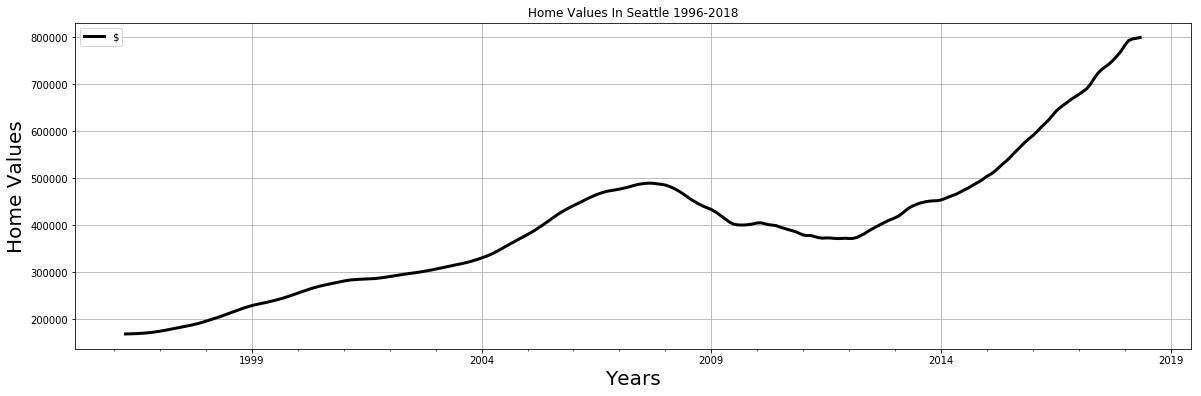

In [38]:
ax = seattle_restr.plot(figsize=(20, 6), title='Home Values In Seattle 1996-2018', linewidth = 3, color = 'k')
ax.legend('$', loc='upper left')
ax.set_xlabel('Years', fontsize = 20)
ax.set_ylabel('Home Values', fontsize = 20)
ax.grid()
ticks = np.arange(labels[0], labels[265])
ax.set_xticks(ticks)
ax.set_xticklabels(seattle_restr.index, fontsize = 15, rotation = 17)